<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula05a_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)

In [4]:
import numpy as np

def plotHiperplano(vector, intercept=0):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

In [5]:
def criaDataset(n=20, slop=[2,1], intercept=-0.4):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

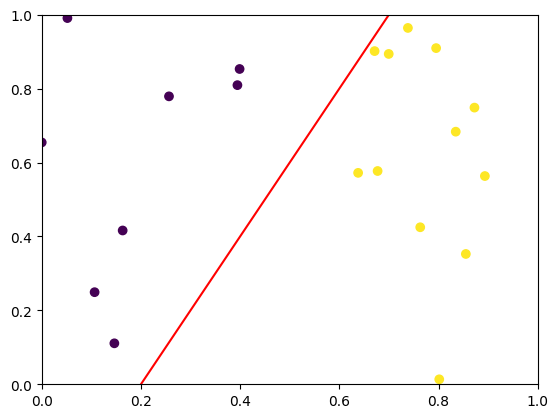

In [9]:
X, y = criaDataset()
plotDataset(X, y)
plotHiperplano([2, -1], -0.4)
plt.show()

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

In [12]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y):
    pass

class PseudoInverse(TrainingAlgorithm):
  def getW(self, X, y):
    w = np.linalg.pinv(X) @ y
    return w


[-1.39801547  3.0107557  -0.03438839]
1.0


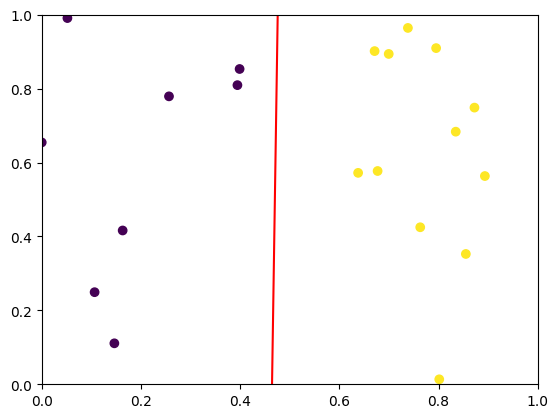

In [85]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, trainingAlgorithm=PseudoInverse()):
    self.trainingAlgorithm = trainingAlgorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.trainingAlgorithm.getW(Xb, y)
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ (self.w))

psedoinverse_model = Perceptron()
psedoinverse_model.fit(X, y)
ypred = psedoinverse_model.predict(X)
print(psedoinverse_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(psedoinverse_model.w[1:], psedoinverse_model.w[0])
plt.show()

In [56]:
class PLA(TrainingAlgorithm):
  def __init__(self, n_iter=100):
    self.n_iter = n_iter
  def getW(self, X, y):
    w = np.random.uniform(size=X.shape[1])*2-1
    # PLA - Percptron Learning Algorithm
    for _ in range(self.n_iter):
      cost = 0
      idx = np.arange(len(y))
      np.random.shuffle(idx)
      for i in idx:
        ypred = sign(X[i].dot(w))
        error = y[i]-ypred
        if error != 0:
          w += error*X[i]
          cost += error**2
      if cost == 0:
        break
    return w

[-2.89349608  7.39759578 -0.45837328]
1.0


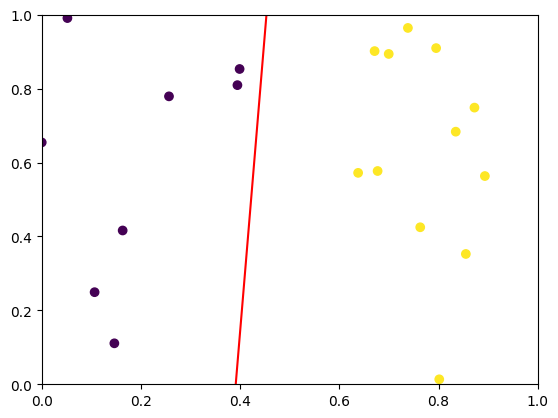

In [57]:
pla_model = Perceptron(PLA())
pla_model.fit(X, y)
ypred = pla_model.predict(X)
print(pla_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(pla_model.w[1:], pla_model.w[0])
plt.show()

[-13.33086407  32.1207727   -0.67965412]
1.0


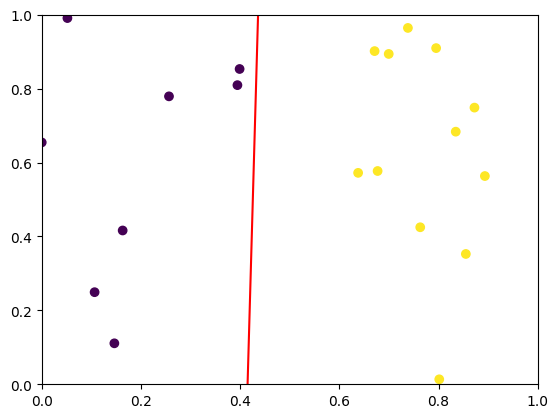

In [61]:
class PLAVect(TrainingAlgorithm):
  def __init__(self, n_iter=500):
    self.n_iter = n_iter
  def getW(self, X, y):
    w = np.random.uniform(size=X.shape[1])*2-1
    # Notação vetorial
    for _ in range(self.n_iter):
      ypred = sign(X.dot(w))
      error = y-ypred
      w += X.T.dot(error)
      cost = np.sum(error**2)
      if cost == 0:
        break
    return w

plavect_model = Perceptron(PLAVect())
plavect_model.fit(X, y)
ypred = plavect_model.predict(X)
print(plavect_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(plavect_model.w[1:], plavect_model.w[0])
plt.show()

[-1.39219136  3.00736204 -0.04032667]
1.0


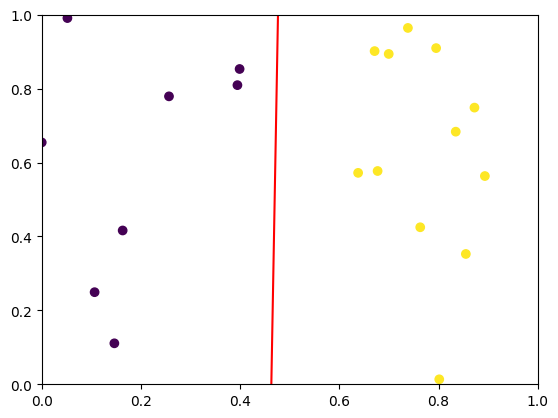

In [84]:
class GradientDescent(TrainingAlgorithm):
  def __init__(self, learning_rate=0.05, n_iter=100):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
  def getW(self, X, y):
    w = np.random.uniform(size=X.shape[1])*2-1
    for _ in range(self.n_iter):
      ypred = X @ w
      error = y-ypred
      w += self.learning_rate * X.T @ (error)
    return w

gradientdescent_model = Perceptron(GradientDescent())
gradientdescent_model.fit(X, y)
ypred = gradientdescent_model.predict(X)
print(gradientdescent_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(gradientdescent_model.w[1:], gradientdescent_model.w[0])
plt.show()

In [131]:
Xtest, ytest = criaDataset(n=1000)

In [133]:
models = [psedoinverse_model, gradientdescent_model, pla_model, plavect_model]

for model in models:
  ypred = model.predict(Xtest)
  model.fit(X, y)
  print(f"{model.trainingAlgorithm.__class__}:",accuracy_score(ytest, ypred))

<class '__main__.PseudoInverse'>: 0.889
<class '__main__.GradientDescent'>: 0.889
<class '__main__.PLA'>: 0.843
<class '__main__.PLAVect'>: 0.907
